In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [5]:
X , y = make_blobs(200, 2, centers=2, random_state=0, cluster_std=2.5)
X += 100

In [6]:
X.shape

(200, 2)

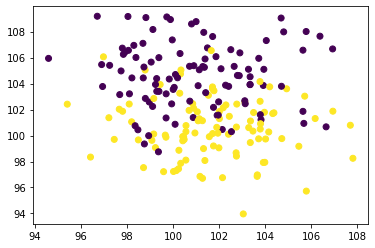

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

(array([ 3., 11., 34., 60., 82., 70., 66., 38., 22., 14.]),
 array([ 93.96618177,  95.48763617,  97.00909058,  98.53054498,
        100.05199939, 101.57345379, 103.0949082 , 104.6163626 ,
        106.13781701, 107.65927141, 109.18072582]),
 <BarContainer object of 10 artists>)

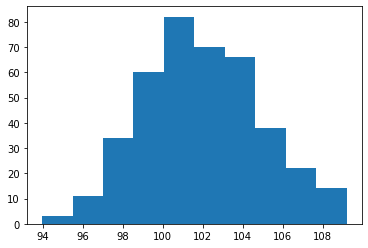

In [12]:
plt.hist( X.flatten() )

In [13]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.75


,0,1
0,15,7
1,3,15


In [14]:
model = BernoulliNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.45


,0,1
0,0,22
1,0,18


In [15]:
model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.675


,0,1
0,10,12
1,1,17


In [16]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame( confusion_matrix(y_test, model.predict(X_test) ) )

0.775


,0,1
0,16,6
1,3,15


### Analiza tekstu - SPAM/HAM

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
sentences = ["Julia kocha Marka", "Marek kocha Annę", "Anna i Julia kochają Marka"]

In [20]:
cv = CountVectorizer()
wm = cv.fit_transform(sentences)
wm

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [21]:
cv.get_feature_names()

['anna', 'annę', 'julia', 'kocha', 'kochają', 'marek', 'marka']

In [22]:
pd.DataFrame( wm.toarray(), columns=cv.get_feature_names() )

,anna,annę,julia,kocha,kochają,marek,marka
0,0,0,1,1,0,0,1
1,0,1,0,1,0,1,0
2,1,0,1,0,1,0,1


In [26]:
df = pd.read_csv("http://51.91.120.89/extras/SMSSpamCollection.csv", sep="\t", header=None, names=["label","text"])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [27]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [28]:
df.label = df.label.map({"ham":0, "spam":1})
df.head(3)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [29]:
pd.set_option("max_colwidth", None)
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


In [31]:
# ^[0-9]{2}-[0-9]{3}$

In [34]:
#df.text.str.replace("[^0-9A-Za-z ]" , "")
df.text = df.text.str.replace("[^\w\s]" , "")

C:\Users\kurs\AppData\Local\Temp/ipykernel_3704/2201065561.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.text = df.text.str.replace("[^\w\s]" , "")


In [35]:
df.head()

,label,text
0,0,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives around here though


In [36]:
cv = CountVectorizer()